# Практика 9

9.1 Генерим 20 сигналов (временных рядов), 2 класса по 10 образцов в каждом.
Постарайтесь сделать их как можно более похожими, и в тоже время различными.

9.2 Ищем шейплеты

9.3 Формируем датасет для обучения классификатора

9.4 Разбиваем набор на train и test

9.5 Обучаем любой классификатор

9.6 Описываем кратко полученные результаты

In [18]:
import numpy as np
import matplotlib.pyplot as plt

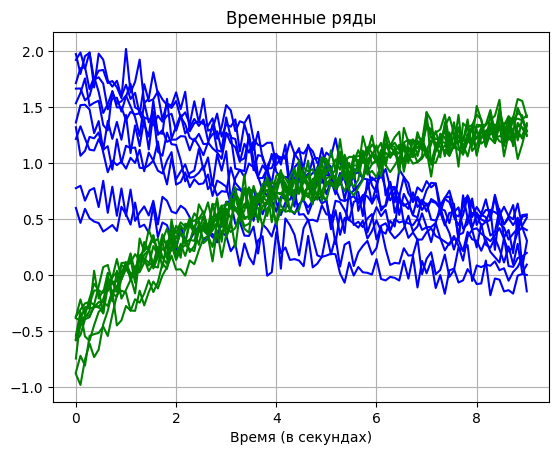

In [20]:
# Индекс и отсчет времени в секундах
time_index = np.linspace(0, 9, 100)

tseries_list = {'Time': time_index}
d = np.random.random(size=10)

N = 10 #количество образцов в каждом типе сигналов

# экспоненциальная функция
for i in range(N):
    noise = np.random.normal(0, 0.1, len(time_index)) # добавляем шум
    tseries_list["Texp"+str(i)]= np.exp(-0.1*time_index + d[i]) - 0.5 + noise

# логарифмическая функция
for i in range(N):
    noise = np.random.normal(0, 0.1, len(time_index)) # добавляем шум
    tseries_list["Tlog"+str(i)]= np.log(time_index + d[i] + 1) - 1 + noise

# отрисовка всех сигналов
for i in range(N):
    plt.plot(time_index, tseries_list["Texp"+str(i)], '-b')
for i in range(N):
    plt.plot(time_index, tseries_list["Tlog"+str(i)], '-g')
            
plt.title(r'Временные ряды')
plt.xlabel(r'Время (в секундах)')
plt.grid()

Init 1
0.002 --> 0.003 --> 
Init 2
0.075 --> 0.062 --> 0.062 --> 
Init 3
0.003 --> 0.003 --> 
Init 4
0.002 --> 0.003 --> 
Init 5
0.070 --> 0.061 --> 0.061 --> 0.061 --> 
Init 6
0.161 --> 0.144 --> 0.083 --> 0.084 --> 
Init 7
0.166 --> 0.132 --> 0.132 --> 
Init 8
Resumed because of empty cluster
Init 8
0.091 --> 0.060 --> 0.059 --> 0.060 --> 
Init 9
0.002 --> 0.003 --> 


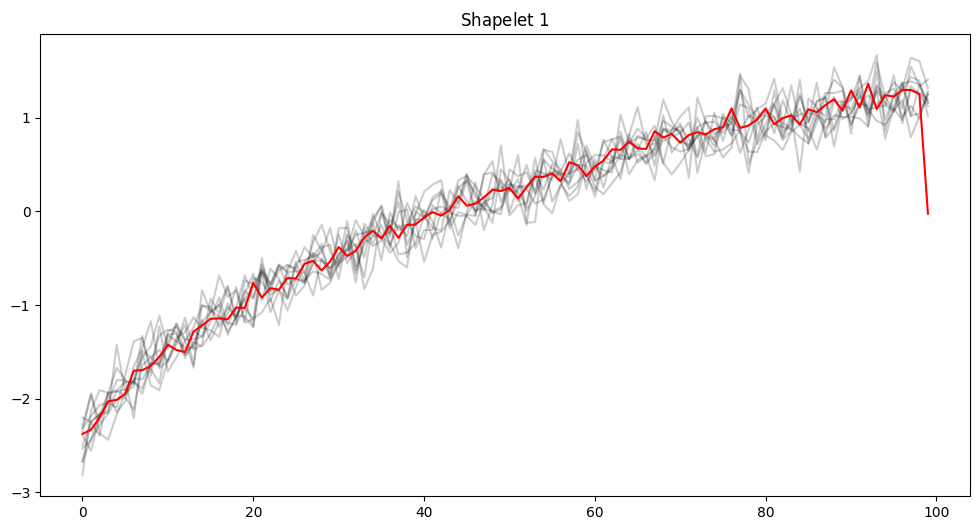

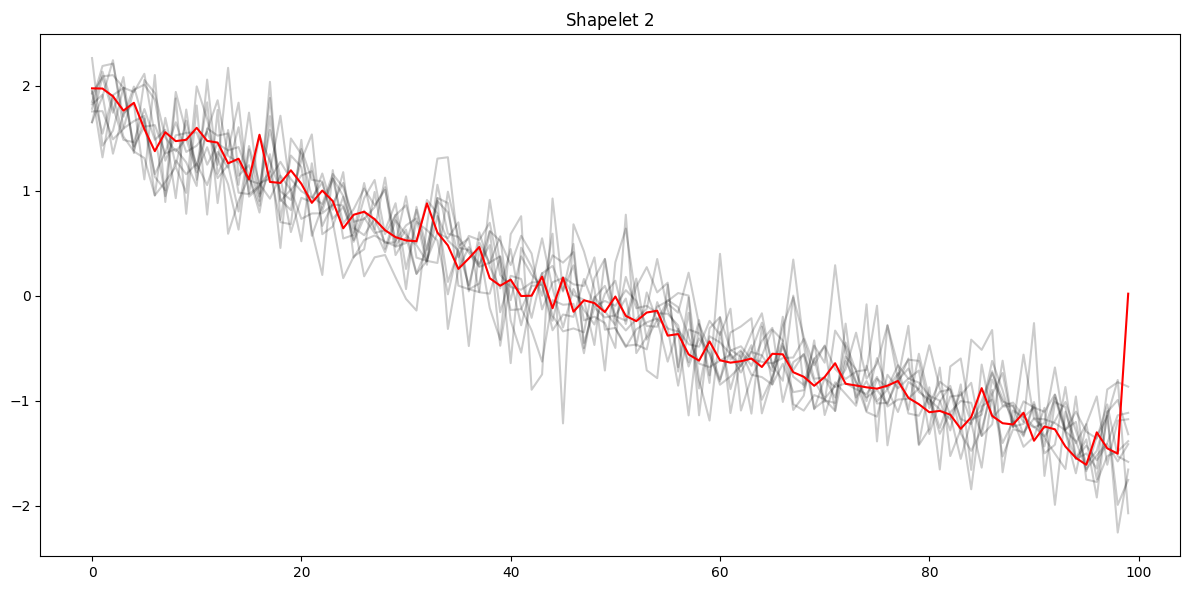

In [43]:
from tslearn.clustering import KShape
from tslearn.preprocessing import TimeSeriesScalerMeanVariance

# Преобразуем данные для дальшейшего использования KShape
time_series = [tseries_list[key] for key in tseries_list if key != 'Time']
time_series = np.array(time_series).reshape((len(time_series), len(time_index), 1))
time_series = TimeSeriesScalerMeanVariance().fit_transform(time_series)

# Используем KShape для кластеризации временных рядов и поиска шейплетов
# Указываем параметр n_clusters=2, т. к. сгенерированы 2 класса временных рядов по 10 рядов в каждом
ks = KShape(n_clusters=2, n_init=10, verbose=True)
y_pred = ks.fit_predict(time_series)

# Рисуем шейплеты
for yi in range(2):
    plt.figure(figsize=(12,6))
    for xx in time_series[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(ks.cluster_centers_[yi].ravel(), "r-")
    plt.title("Shapelet $%d$" % (yi + 1))

plt.tight_layout()
plt.show()


Ожидаемо, фукнция KShape успешно кластеризовала предоставленные ряды и разбила их на 2-а кластера.
Каждый график представляет один шейплет. Все временные ряды, которые были отнесены к этому шейплету, отображаются на графике серым цветом. Красная линия на графике является “средним” временным рядом для всех временных рядов в кластере

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [40]:
# Создаем метки для классов
labels = [0]*N + [1]*N

# Преобразуем список временных рядов и меток в numpy массивы
time_series = np.array(time_series)
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(time_series, labels, test_size=0.2, random_state=42)

In [41]:
# Создаем классификатор
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучаем классификатор
clf.fit(X_train.reshape(len(X_train), -1), y_train)

RandomForestClassifier(random_state=42)

In [42]:
# Предсказываем метки для тестового набора
y_pred = clf.predict(X_test.reshape(len(X_test), -1))

# Выводим отчет о классификации
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



Согласно выводу отчета классификации, классификатор успешно научился отличать два класса временных рядов 